In [2]:
#!pip3 install boto3

https://docs.aws.amazon.com/rekognition/latest/dg/images.html

In [6]:
import base64
import boto3
import json
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [7]:
ls *

gasmeter.png    rekognition.ipynb       smart_meter.jpg
people_car.jpg  rekognition-text.ipynb


In [12]:
FIG_SIZE = (20, 12)
image_file='gasmeter.png'

REGION='us-west-2'
client=boto3.client('rekognition', region_name=REGION)

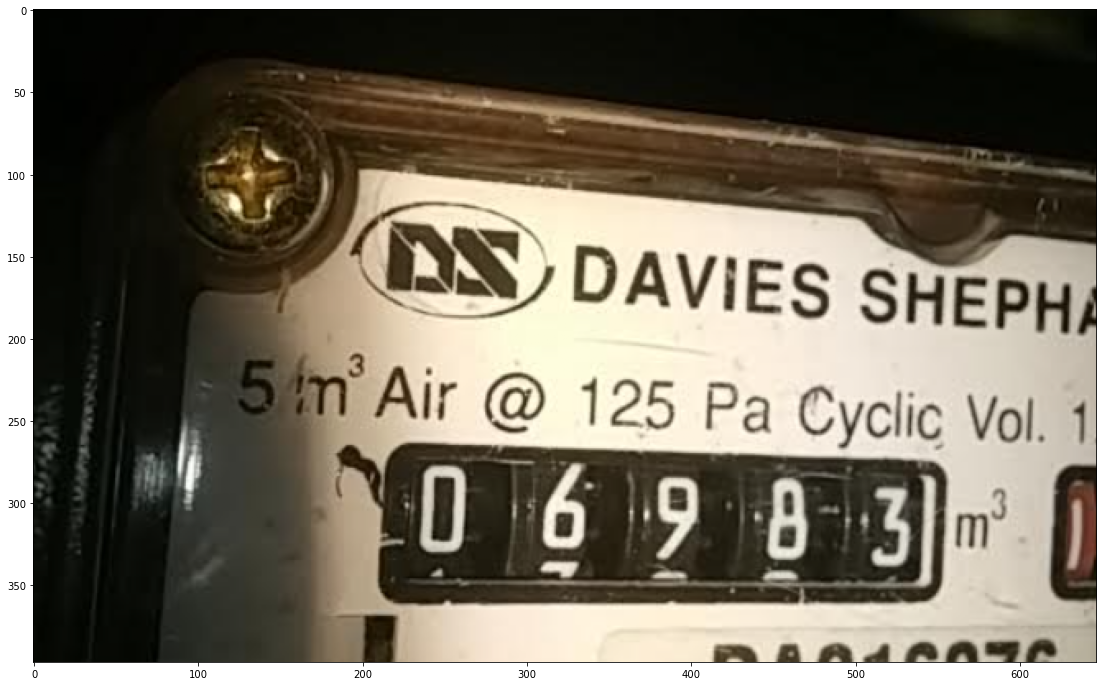

In [9]:
img = plt.imread(image_file)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

## Text
https://docs.aws.amazon.com/rekognition/latest/dg/text-detecting-text-procedure.html

In [13]:
%%time

with open(image_file, 'rb') as image:
    try:
        response = client.detect_text(Image={'Bytes': image.read()})
    except Exception as exc:
        print(exc)

CPU times: user 27.6 ms, sys: 3.76 ms, total: 31.4 ms
Wall time: 4.54 s


In [14]:
[t['DetectedText'] for t in response['TextDetections']]

['DAVIES SHEPH',
 '5in3A Air @ a 125',
 'Pa Cyclic Vol. 1',
 '0 6 9 B 3 m3',
 'DAVIES',
 'SHEPH',
 '5in3A',
 'Air',
 '@',
 'a',
 '125',
 'Pa',
 'Cyclic',
 'Vol.',
 '1',
 '0',
 '6',
 '9',
 'B',
 '3',
 'm3']

Has picked up the number plate but with incorrect 8 as a B

## Filters
Can filter with ROI: Limits detection to a specific region of the image frame. The values are relative to the frame's dimensions. For text only partially within a region, the response is undefined.

In [17]:
left = 0
top = 0
height = 1
width = 0.34

with open(image_file, 'rb') as image:
    try:
        response = client.detect_text(
            Image={'Bytes': image.read()},
            Filters={'RegionsOfInterest': [
                {'BoundingBox': {
                    'Height': height, 
                    'Left': left, 
                    'Top': top, 
                    'Width': width
                }}]
                    })
    except Exception as exc:
        print(exc)

In [18]:
[t['DetectedText'] for t in response['TextDetections']]

['5in3A', '5in3A']